# Gravity Assist Maneuver
Alejandro Alonso | Final Project for Matter, Energy, Space, and Time

## Project Assumptions

- Spaceship moves strictly forward at constant velocity (As in conserving fuel)
- Assume planet is stationary and atmosphere is negligible
- Spaceship starts when planet's exerted gravitational force is exactly 0.01 Newtons
- Spaceship is initally aimed towards a point X planetary radii away from center of planet (see constants) (D)
- All calculations from "perspective" of spaceship
- Spaceship starts at (0, 0)
- Planet starts at (1.5R, D)

## Imports

In [21]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from components import G, Point, Planet, Spaceship

## Constants
Change as wanted, recommended values are in comments

In [ ]:
M_planet = 6.39e23  # 6.39e23
M_spacecraft = 5.05e4  # 5.05e4
V_spacecraft = 1.36e3  # 1.36e3
R_planet = 3.3895e6  # 3.3895e6
planet_starting_x_dist = 4 * R_planet  # 4 * R_planet
threshold = 1e3  # 1e3

## Simulation Setup

In [23]:
distance_from_spaceship = math.sqrt(
    G * M_planet * M_spacecraft / threshold
)

planet_origin = Point(planet_starting_x_dist, (
        distance_from_spaceship ** 2 - planet_starting_x_dist ** 2
    ) ** 0.5)

planet = Planet(M_planet, R_planet, planet_origin)

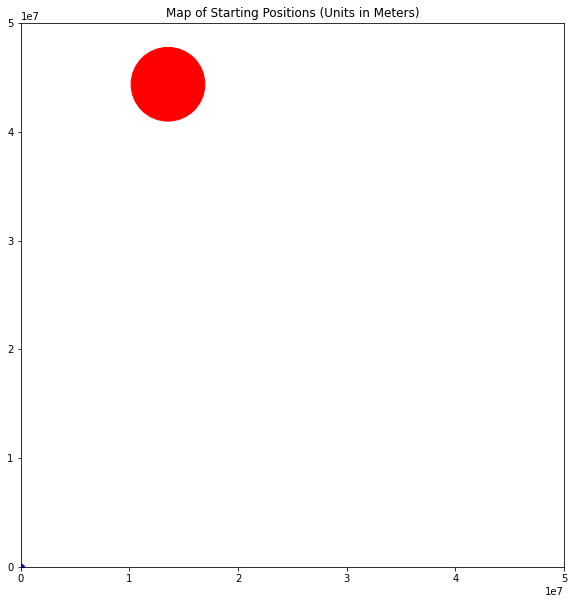

In [41]:
circle = patches.Circle(planet.origin.coordinates, planet.radius, color='r')
#circle = patches.Circle((5e10, 5e10), 1e10)

fig, ax = plt.subplots(figsize=(10,10))
ax.add_patch(circle)

ax.set_xlim(-10, 50_000_000)
ax.set_ylim(-10, 50_000_000)
ax.set_aspect('equal')

ax.plot(0, 0, 'bo')

ax.set_title("Map of Starting Positions (Units in Meters)")

plt.show()

In [30]:
spaceship = Spaceship(M_spacecraft, V_spacecraft)
spaceship._loc = Point(0, 0)
spaceship._path = [spaceship._loc.coordinates]

print("PRE-SIM")
print(f"Starting Spaceship Values (kg, m/s): {spaceship}")
print(f"Starting Planet Values (kg, m): {planet}")

s = 0
while (
        spaceship.location.distance_to(planet.origin) <= distance_from_spaceship 
        and not spaceship.crashed
    ):
    spaceship.move(planet)
    s += 1

final_heading = spaceship.get_heading_change()
final_velocity = spaceship.velocity

print("\nSIM RESULTS")
print(f"Spaceship Crashed: {spaceship.crashed}")
print(f"Time for Maneuver (s): {s}")
print(f"Time for Maneuver (hr): {round(s / 60 / 60, 2)}")
print(f"Heading Change (Degrees): {final_heading}")
print(f"Final Velocity (m/s): {final_velocity}")

PRE-SIM
Starting Spaceship Values (kg, m/s): Spaceship(Mass=50500.0, Vy=1360.0, Vx=0, Pos=(0, 0))
Starting Planet Values (kg, m): Planet(Mass=6.39e+23, Radius=3389500.0, Origin=(13558000.0, 44384049.7757922))

SIM RESULTS
Spaceship Crashed: False
Time for Maneuver (s): 51024
Time for Maneuver (hr): 14.17
Heading Change (Degrees): 145.62180437873934
Final Velocity (m/s): 1360.0177021452496


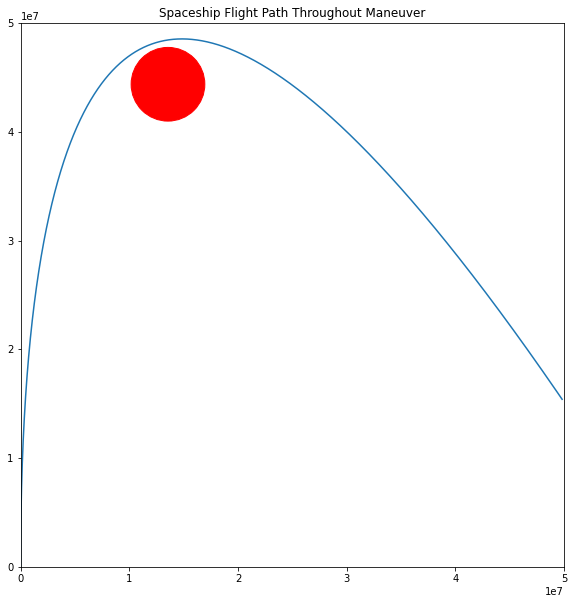

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
circle = patches.Circle(planet.origin.coordinates, planet.radius, color='r')

ax.add_patch(circle)
ax.plot(*zip(*spaceship.path))

ax.set_xlim(0, 50_000_000)
ax.set_ylim(0, 50_000_000)
ax.set_aspect('equal')

ax.set_title("Spaceship Flight Path Throughout Maneuver")

plt.show()